# 06_Figure4_source_table

generate source table file for Figure 4


Run with this command in docker container

docker run --rm -d --name gseapy -p 8885:8888 -e JUPYTER_ENABLE_LAB=YES -v /Users/efast/Documents/:/home/jovyan/work gseapy:0.10.4

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from gprofiler import GProfiler
import seaborn as sns; sns.set() 
from helper_functions import *
from openpyxl.workbook import Workbook

from upsetplot import UpSet
import re

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

## Plotting of results

In [2]:
sns.set_style("ticks")

In [3]:
# define function

def plot_proportions(treatment):
    path_name_in = inpath + 'overlaps_' + treatment + '_' + '.csv'
    df_all = pd.read_csv(path_name_in)
    df_clean = df_all[(df_all['Unnamed: 0'] != 'total_LSK_only') &
                       (df_all['Unnamed: 0'] != 'total_overlap') &
                       (df_all['Unnamed: 0'] != 'total_HSC_only')]
    df_clean = df_clean.set_index('Unnamed: 0')
    percent_df = df_clean.iloc[:,0:6].div(df_clean.sum(axis=0), axis=1)
    percent_df = percent_df.reindex(['up_HSC_only',
                                     'down_HSC_only',
                                     'directionality_difference',
                                     'up_overlap',
                                     'down_overlap',
                                     'up_LSK_only',
                                     'down_LSK_only',
                                     ])
    ax = percent_df.T.plot.bar(stacked=True, color = def_color)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylabel("proportion of genes")
    df_clean.to_csv(inpath + '_' + treatment + 'diffgenes_table.csv', index=True, header=True)

In [4]:
inpath ='/home/jovyan/work/Z_TRASH/write/'

In [5]:
# define some colors to identify clusters

def_color = ['#7D3C98',
             '#BB8FCE',
             '#17202A',
             '#566573',
             '#D5D8DC',
             '#229954',
             '#7DCEA0']

#https://htmlcolorcodes.com/color-chart/

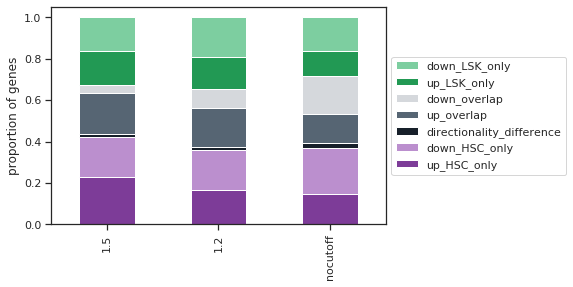

In [6]:
plot_proportions('dmPGE2')

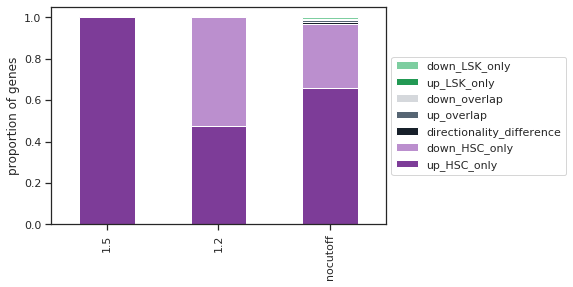

In [7]:
plot_proportions('indo')

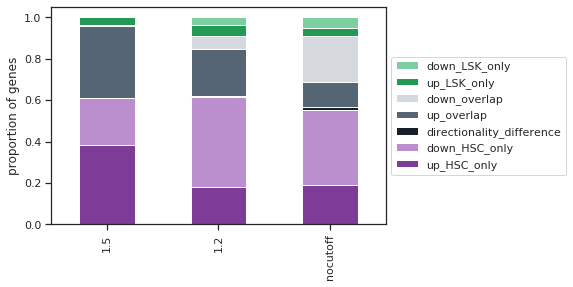

In [8]:
plot_proportions('pIC')

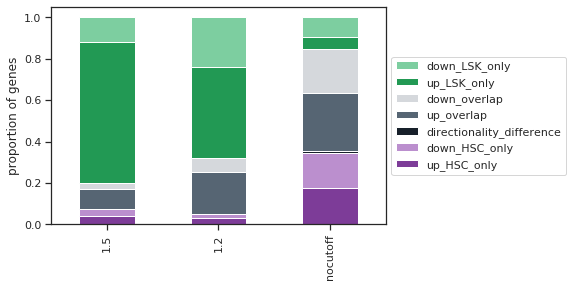

In [9]:
plot_proportions('GCSF')

In [10]:
# chi-square test comparing % cell cycle + metabolism in HSCs and LSKs - TODO - verify with DPA

df_HSC = pd.read_csv(inpath + 'LT_cell_numbers.csv')
df_LSK = pd.read_csv(inpath + 'MPP_leiden_within_treatment.csv')


df_HSC = df_HSC.set_index('leiden')
HSC_cycle =  df_HSC.loc['Metabolism']['ct'] + df_HSC.loc['Cell-cycle']['ct']
HSC_rest = df_HSC['ct'].sum() - HSC_cycle 

df_LSK = df_LSK.set_index('leiden')
LSK_cycle =  df_LSK.loc['Metabolism']['ct'] + df_LSK.loc['Cell-cycle']['ct']
LSK_rest = df_LSK['ct'].sum() - LSK_cycle

In [11]:
from scipy.stats import chi2_contingency
obs = np.array([[HSC_cycle, HSC_rest],[ LSK_cycle, LSK_rest]])
chi2, p, dof, ex = chi2_contingency(obs)
print('p-value', p)
print('chi2', chi2)

p-value 1.673695935108265e-05
chi2 18.528648489932685


In [12]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.25-linuxkit
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.3
numpy            : 1.17.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 41.6.0.post20191101
Cython           : 0.29.14
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.9.0
pandas_datareader: None
bs4              : 4.8.1
bottleneck       : None
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.6.3
matplotlib      

In [13]:
!pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
appdirs                1.4.4              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.1              
bioservices            1.7.11             
bleach                 3.1.0              
blinker                1.4                
bokeh                  1.3.4              
cellbrowser            0.7.7              
certifi                2020.4.5.1         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
Click                  7.0                
cloudpickle            1.2.2              
colorama               0.4.4              
colorlog               5.0.1              
conda                  4.7.12             
conda-packa